<a href="https://colab.research.google.com/github/AyushPratapSingh288/Potato_disease/blob/main/actual_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/AyushPratapSingh288/Potato_disease.git

Cloning into 'potato-disease-project-ml'...
remote: Enumerating objects: 2171, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2171 (delta 0), reused 0 (delta 0), pack-reused 2168
Receiving objects: 100% (2171/2171), 44.03 MiB | 32.13 MiB/s, done.


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
import tensorflow as tf
from keras import models,layers
import matplotlib.pyplot as plt



In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50
train_path='/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training/PlantVillage'

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training')

ds_train=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training',
                                          shuffle=True,
                                          image_size=(256,256),
                                          batch_size=BATCH_SIZE
                                          )

Found 2152 files belonging to 3 classes.
Found 2152 files belonging to 3 classes.


In [ ]:
!pip install tensorflow

In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install numpy

In [ ]:
import numpy

(32, 256, 256, 3)
tf.Tensor([1 0 0 1 1 1 1 2 0 1 0 0 0 1 0 0 1 0 0 0 0 2 2 0 0 0 1 1 0 0 0 1], shape=(32,), dtype=int32)


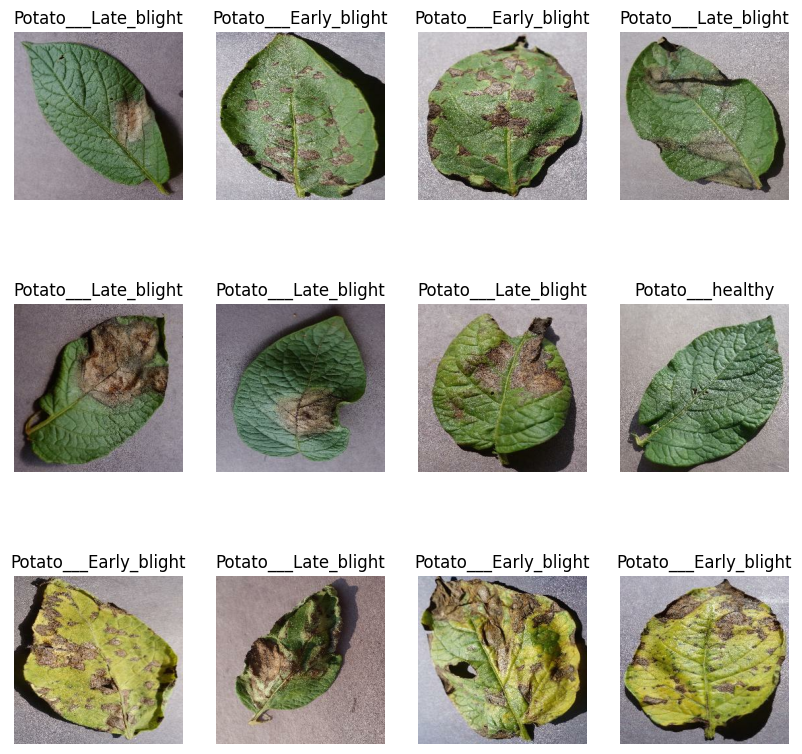

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in ds_train.take(1):
    print(image_batch.shape)
    print(labels_batch)
    for i in range(12):

      ax=plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")



In [ ]:
train_size=0.8
len(ds_train)*train_size

54.400000000000006

In [ ]:
trainset=ds_train.take(54)
len(trainset)

54

In [ ]:
testset=ds_train.skip(54)
len(testset)

14

In [ ]:
val_size=0.1
len(ds_train)*val_size

6.800000000000001

In [ ]:
valset=testset.take(6)
len(valset)

6

In [ ]:
testset=testset.skip(6)
len(testset)

8

In [ ]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split)==1
    ds_size=len(ds)
    if shuffle:
      ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    trainset=ds.take(train_size)
    valset=ds.skip(train_size).take(val_size)
    testset=ds.skip(train_size).skip(val_size)
    return trainset,valset,testset

In [ ]:
trainset,valset,testset=get_dataset_partition(ds_train)

In [ ]:
len(trainset)
# has 54 batches=54*32 images

54

In [ ]:
len(valset)


6

In [ ]:
len(testset)

8

In [ ]:
trainset=trainset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valset=valset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testset=testset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch in ds_train.take(1):
  print(image_batch[0].numpy()/255)

[[[[0.44313726 0.43137255 0.4745098 ]
   [0.41960785 0.40784314 0.4509804 ]
   [0.56078434 0.54901963 0.5921569 ]
   ...
   [0.49411765 0.4862745  0.5294118 ]
   [0.52156866 0.5137255  0.5568628 ]
   [0.54509807 0.5372549  0.5803922 ]]

  [[0.5176471  0.5058824  0.54901963]
   [0.627451   0.6156863  0.65882355]
   [0.45490196 0.44313726 0.4862745 ]
   ...
   [0.42352942 0.41568628 0.45882353]
   [0.45882353 0.4509804  0.49411765]
   [0.49019608 0.48235294 0.5254902 ]]

  [[0.5686275  0.5568628  0.6       ]
   [0.44705883 0.43529412 0.47843137]
   [0.50980395 0.49803922 0.5411765 ]
   ...
   [0.47058824 0.4627451  0.5058824 ]
   [0.4745098  0.46666667 0.50980395]
   [0.47843137 0.47058824 0.5137255 ]]

  ...

  [[0.69411767 0.68235296 0.70980394]
   [0.7019608  0.6901961  0.7176471 ]
   [0.69803923 0.6862745  0.7137255 ]
   ...
   [0.50980395 0.49019608 0.5176471 ]
   [0.56078434 0.5411765  0.5686275 ]
   [0.6392157  0.61960787 0.64705884]]

  [[0.70980394 0.69803923 0.7254902 ]
   [0.6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

IMAGE_SIZE=256
image = Sequential(
[layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.1),
layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,-0.3),interpolation='bilinear'),
layers.RandomContrast(factor=0.1),
layers.RandomTranslation(height_factor=0.1,width_factor=0.1),
layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
layers.Rescaling(1.0/255)],
)

In [ ]:
from tensorflow.keras import layers, models


n_classes = 3

input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    image,

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
   metrics=['accuracy']
)

In [ ]:
history= model.fit(
    ds_train,
    batch_size=BATCH_SIZE,
    validation_data=valset,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
68/68 [==============================] - 292s 4s/step - loss: 0.8907 - accuracy: 0.4865 - val_loss: 0.6929 - val_accuracy: 0.7560
Epoch 2/50
68/68 [==============================] - 9s 121ms/step - loss: 0.5972 - accuracy: 0.7421 - val_loss: 0.4729 - val_accuracy: 0.8214
Epoch 3/50
68/68 [==============================] - 9s 115ms/step - loss: 0.4328 - accuracy: 0.8281 - val_loss: 0.3151 - val_accuracy: 0.8750
Epoch 4/50
68/68 [==============================] - 8s 101ms/step - loss: 0.4452 - accuracy: 0.8285 - val_loss: 0.2725 - val_accuracy: 0.9167
Epoch 5/50
68/68 [==============================] - 9s 124ms/step - loss: 0.3761 - accuracy: 0.8536 - val_loss: 0.1481 - val_accuracy: 0.9405
Epoch 6/50
68/68 [==============================] - 9s 115ms/step - loss: 0.2489 - accuracy: 0.9001 - val_loss: 0.3139 - val_accuracy: 0.8690
Epoch 7/50
68/68 [==============================] - 9s 114ms/step - loss: 0.2157 - accuracy: 0.9168 - val_loss: 0.1430 - val_accuracy: 0.9464
Epoch 8

In [ ]:
score=model.evaluate(testset)

8/8 [==============================] - 6s 27ms/step - loss: 0.0675 - accuracy: 0.9805


In [ ]:
score

[0.06746301800012589, 0.98046875]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 68}

In [ ]:
history.history['accuracy']

[0.48652416467666626,
 0.7421003580093384,
 0.828066885471344,
 0.8285316228866577,
 0.8536245226860046,
 0.9000929594039917,
 0.9168215394020081,
 0.9344795346260071,
 0.9368029832839966,
 0.9307620525360107,
 0.9567843675613403,
 0.9679368138313293,
 0.9549256563186646,
 0.9549256563186646,
 0.9558550119400024,
 0.9688661694526672,
 0.9744423627853394,
 0.970724880695343,
 0.9539963006973267,
 0.9670074582099915,
 0.9725836515426636,
 0.9721189737319946,
 0.9656133651733398,
 0.9711896181106567,
 0.9730483293533325,
 0.9804832935333252,
 0.9772304892539978,
 0.9763011336326599,
 0.981877326965332,
 0.9711896181106567,
 0.9670074582099915,
 0.9786245226860046,
 0.981877326965332,
 0.9879181981086731,
 0.9800186157226562,
 0.9772304892539978,
 0.9800186157226562,
 0.9828066825866699,
 0.9869888424873352,
 0.9795538783073425,
 0.988382875919342,
 0.9865241646766663,
 0.9879181981086731,
 0.982342004776001,
 0.9804832935333252,
 0.9916356801986694,
 0.9860594868659973,
 0.983271360397338

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

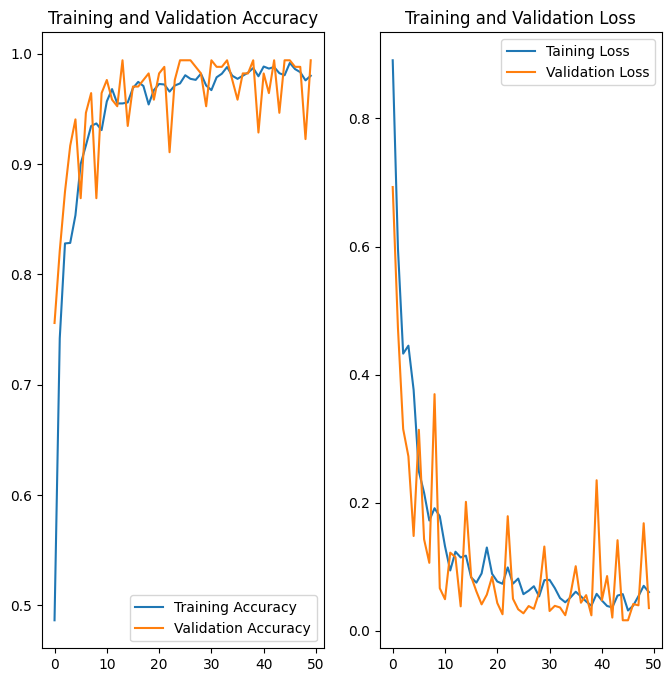

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss,label='Taining Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 149ms/step
Predicted Lable: Potato___Late_blight


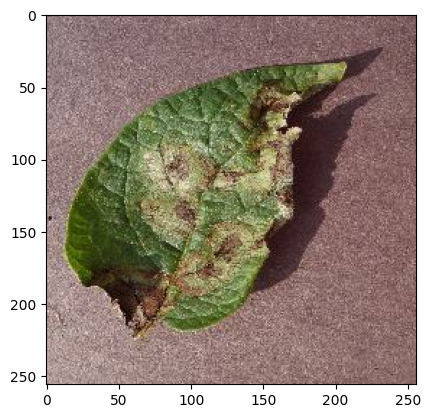

In [ ]:
import numpy as np
for image_batch,labels_batch in testset.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  print("First image to predict")
  plt.imshow(first_image)
  print("Actual Label:",class_names[labels_batch[0].numpy()])
  batch_prediction=model.predict(image_batch)
  print("Predicted Lable:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[1].numpy())
  img_array=tf.expand_dims(img_array,0)
  prediction=model.predict(img_array)
  predicted_class=class_names[np.argmax(prediction[0])]
  confidence=round(100*(np.max(prediction[0])),2)
  return predicted_class,confidence


1/1 [==============================] - 0s 19ms/step


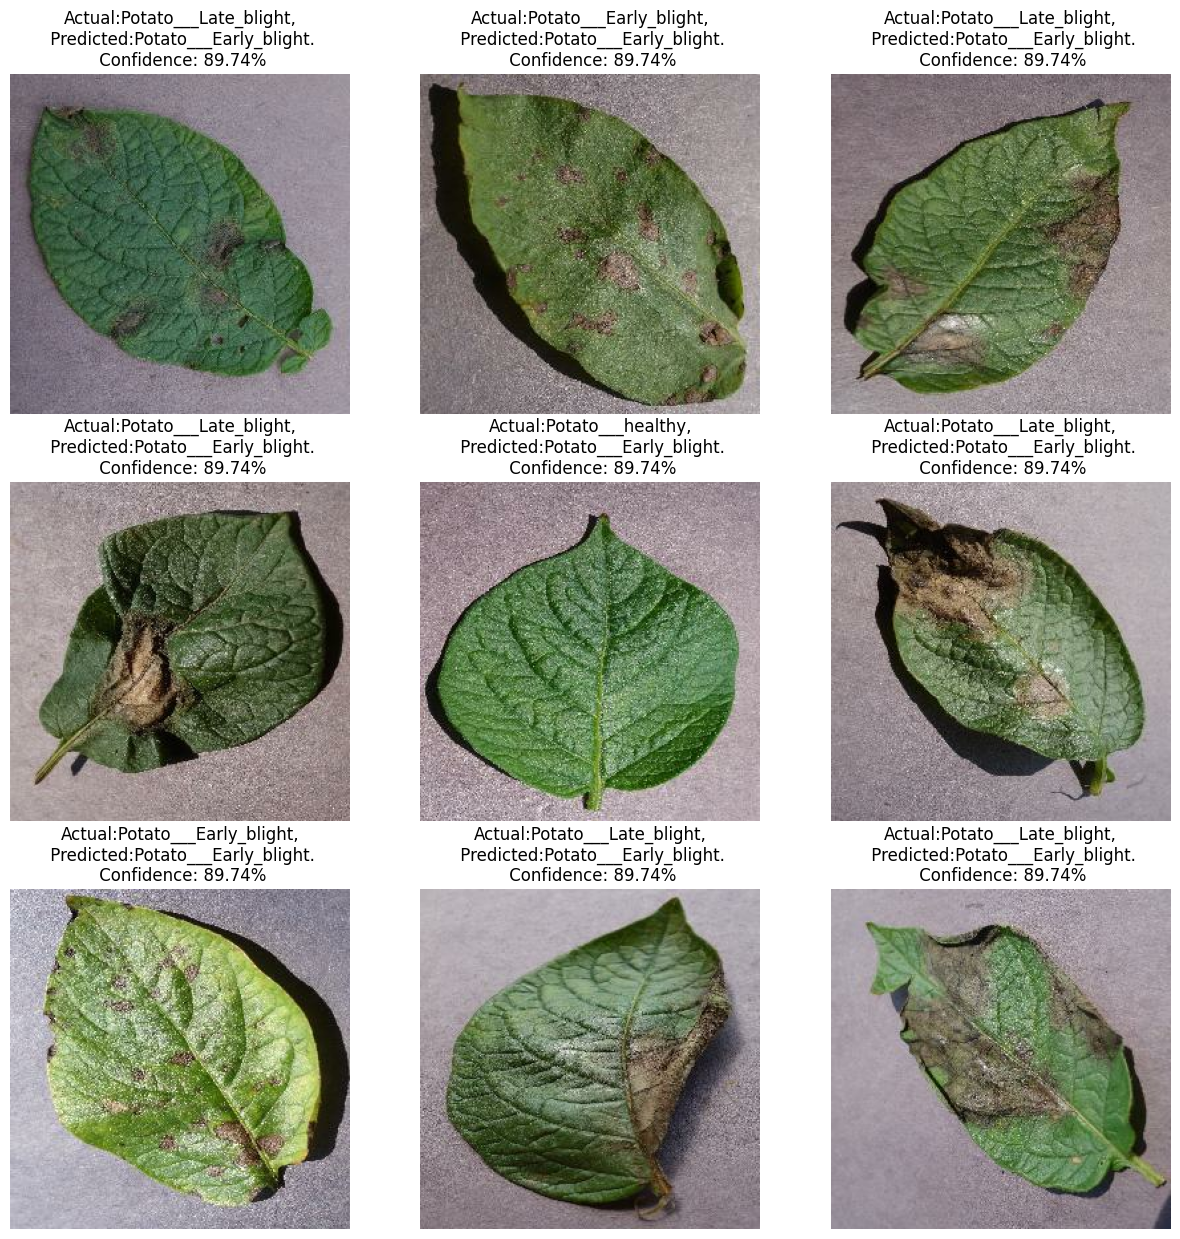

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in trainset.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
  plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/model_build.hfd5')